<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Period-Tracker/PeriodTrackerRandomForestWithPolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('PeriodData.csv')
np.random.seed(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [6]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [7]:
columns = df.columns
print(columns)

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [8]:
df = df[['ClientID', 'CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'MeanMensesLength']]

In [9]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,,15,12,5,
2,nfp8122,3,29,,15,14,5,
3,nfp8122,4,27,,15,12,5,
4,nfp8122,5,28,,16,12,5,


In [10]:
df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')

In [11]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49


In [12]:
df =df.replace(' ', np.nan)

In [13]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
...,...,...,...,...,...,...,...,...
1660,nfp8334,7,29,29.63,19,10,8,NaN
1661,nfp8334,8,28,29.63,17,11,6,NaN
1662,nfp8334,9,28,29.63,16,12,5,NaN
1663,nfp8334,10,40,29.63,27,13,6,NaN


In [14]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
...,...,...,...,...,...,...,...,...
1660,nfp8334,7,29,29.63,19,10,8,NaN
1661,nfp8334,8,28,29.63,17,11,6,NaN
1662,nfp8334,9,28,29.63,16,12,5,NaN
1663,nfp8334,10,40,29.63,27,13,6,NaN


In [15]:
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',	'LengthofLutealPhase',	'LengthofMenses',	'MeanMensesLength']
for col in columns_to_convert:
               df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                     0
CycleNumber                  0
LengthofCycle                0
MeanCycleLength            256
EstimatedDayofOvulation    150
LengthofLutealPhase        151
LengthofMenses               4
MeanMensesLength           268
dtype: int64


In [17]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(df)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17.0,12.0,5.0,4.49
1,nfp8122,2,27,27.33,15.0,12.0,5.0,4.49
2,nfp8122,3,29,27.33,15.0,14.0,5.0,4.49
3,nfp8122,4,27,27.33,15.0,12.0,5.0,4.49
4,nfp8122,5,28,27.33,16.0,12.0,5.0,4.49
5,nfp8122,6,26,27.33,15.0,11.0,5.0,4.49
6,nfp8122,7,29,27.33,16.0,13.0,5.0,4.49
7,nfp8122,8,24,27.33,14.0,10.0,4.0,4.49
8,nfp8122,9,28,27.33,16.0,12.0,6.0,4.49
9,nfp8122,10,28,27.33,17.0,11.0,5.0,4.49


In [18]:
def fill_missing_menses_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanMensesLength' is missing (NaN), calculate the mean of 'LengthofMenses'
        if group['MeanMensesLength'].isnull().any():
            mean_menses_length = group['LengthofMenses'].mean()

            # Fill missing MeanMensesLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanMensesLength'] = df.loc[df['ClientID'] == client_id, 'MeanMensesLength'].fillna(mean_menses_length)

    return df

In [19]:
df = fill_missing_menses_length(df)

In [20]:
def fill_missing_cycle_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanCycleLength' is missing (NaN), calculate the mean of 'LengthofCycle'
        if group['MeanCycleLength'].isnull().any():
            mean_cycle_length = group['LengthofCycle'].mean()

            # Fill missing MeanCycleLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanCycleLength'] = df.loc[df['ClientID'] == client_id, 'MeanCycleLength'].fillna(mean_cycle_length)

    return df

In [21]:
df = fill_missing_cycle_length(df)

In [22]:
def fill_missing_luteal_phase(df):
    # Loop through each unique ClientID and calculate mean Luteal Phase length
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing Luteal Phase lengths for this ClientID
        mean_luteal_phase = group['LengthofLutealPhase'].mean()

        # If the mean Luteal Phase is not NaN, fill missing values with the mean
        if not pd.isna(mean_luteal_phase):
            df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'] = df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'].fillna(mean_luteal_phase)

    return df

In [23]:
df = fill_missing_luteal_phase(df)

In [24]:
def fill_missing_ovulation_day(df):
    # Loop through each unique ClientID and calculate mean Estimated Day of Ovulation
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing EstimatedDayofOvulation values for this ClientID
        mean_ovulation_day = group['EstimatedDayofOvulation'].mean()

        # If the mean is not NaN, fill missing values with the mean for the current ClientID
        if not pd.isna(mean_ovulation_day):
            df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'] = df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'].fillna(mean_ovulation_day)

    return df

In [25]:
df = fill_missing_ovulation_day(df)

In [26]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                   0
CycleNumber                0
LengthofCycle              0
MeanCycleLength            0
EstimatedDayofOvulation    3
LengthofLutealPhase        3
LengthofMenses             4
MeanMensesLength           0
dtype: int64


In [27]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

     ClientID  CycleNumber  LengthofCycle  MeanCycleLength  \
406   nfp8085            1             48            40.00   
407   nfp8085            2             32            40.00   
1047  nfp8226            1             24            24.00   
1107  nfp8237           18             25            25.85   
1298  nfp8276           10             27            26.58   
1340  nfp8282           14             29            32.07   
1664  nfp8334           11             24            29.63   

      EstimatedDayofOvulation  LengthofLutealPhase  LengthofMenses  \
406                       NaN                  NaN             6.0   
407                       NaN                  NaN             5.0   
1047                      NaN                  NaN             4.0   
1107                16.000000                  9.0             NaN   
1298                17.000000                 10.0             NaN   
1340                20.615385                 12.0             NaN   
1664         

In [28]:
df = df[df['ClientID'] != 'nfp8085']

In [29]:
df = df[df['ClientID'] != 'nfp8226' ]

In [30]:
df.loc[:, 'LengthofLutealPhase'] = df.groupby('ClientID')['LengthofLutealPhase'].transform(lambda x: x.fillna(x.mean()))
df.loc[:, 'LengthofMenses'] = df.groupby('ClientID')['LengthofMenses'].transform(lambda x: x.fillna(x.mean()))

In [31]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ClientID, CycleNumber, LengthofCycle, MeanCycleLength, EstimatedDayofOvulation, LengthofLutealPhase, LengthofMenses, MeanMensesLength]
Index: []


In [32]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 14 duplicate rows in the data set.
The duplicate rows were removed.


In [33]:
df = df.drop(columns=['ClientID'])
df = df.drop(columns=['LengthofLutealPhase'])

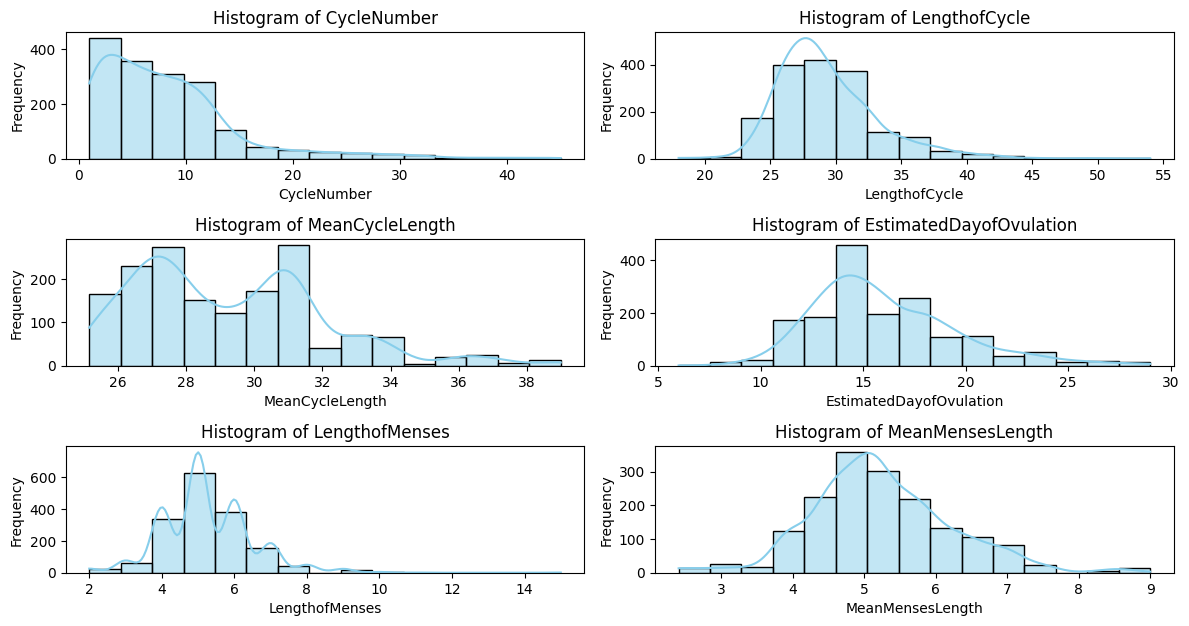

In [34]:
# Plot histograms
columns_to_plot = ['CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofMenses',
       'MeanMensesLength']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

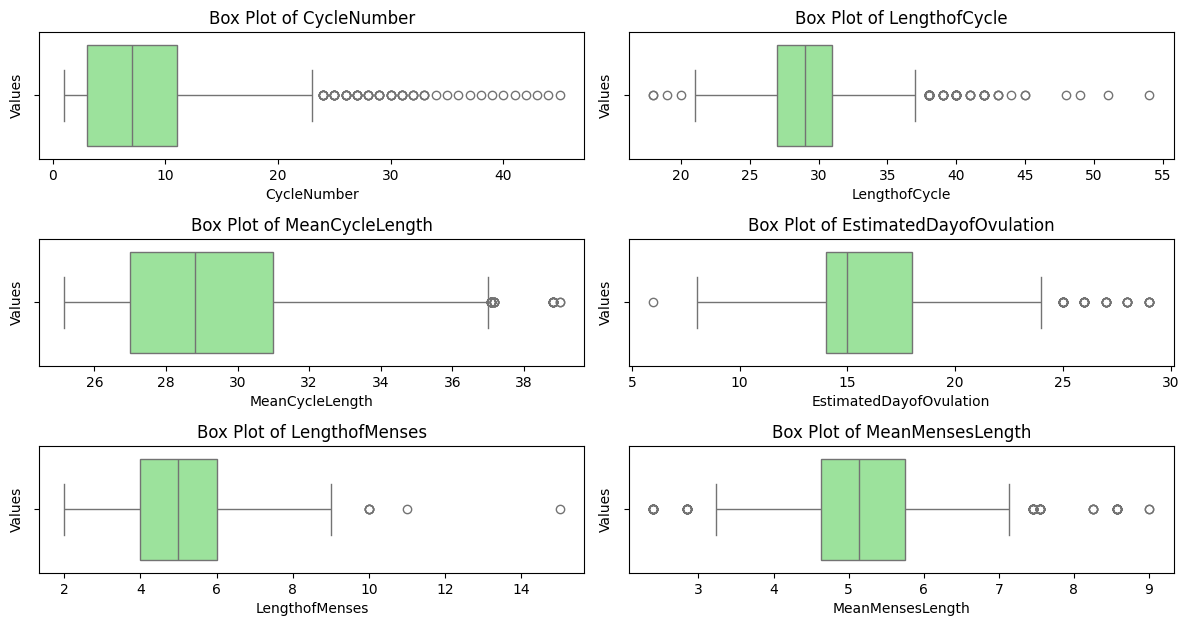

In [35]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

Mean Squared Error: 3.6407898343155782
R-squared: 0.7150216457859212
Mean Absolute Error: 1.396493117797904


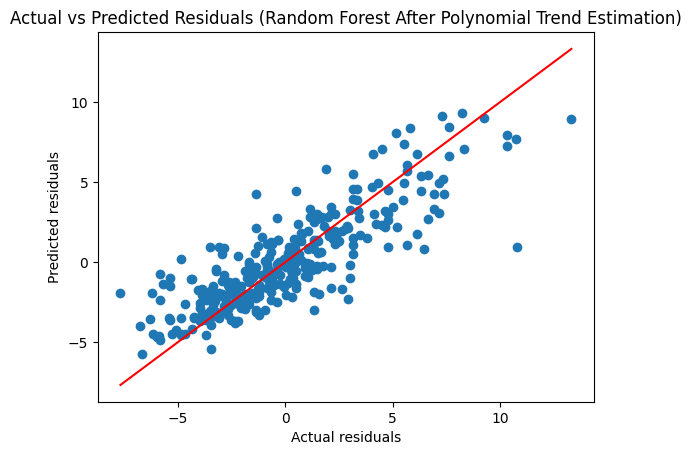

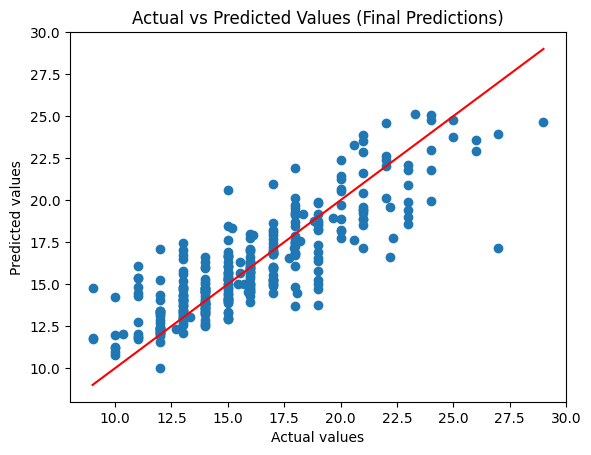

In [38]:
# Assuming df is your data and 'EstimatedDayofOvulation' is the target variable
# Example: If you have a 'CycleNumber', treat it as a cyclical feature

# 1. Create cyclical features based on 'CycleNumber' (if applicable) before fitting PolynomialFeatures
df['CycleNumber_sin'] = np.sin(2 * np.pi * df['CycleNumber'] / df['CycleNumber'].max())
df['CycleNumber_cos'] = np.cos(2 * np.pi * df['CycleNumber'] / df['CycleNumber'].max())

# 2. Split the data into predictors (X) and the target (y)
# before creating PolynomialFeatures and adding the cyclical features
X = df[['CycleNumber']]  # Only 'CycleNumber' for PolynomialFeatures
y = df['EstimatedDayofOvulation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Now create the PolynomialFeatures and fit_transform using X_train
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# 4. Fit a polynomial regression model to estimate the trend
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(X_train_poly, y_train)  # Use y_train for the target
trend = trend_model.predict(X_train_poly)

# 5. Calculate residuals using y_train and predicted trend
residuals = y_train - trend

# 6. Prepare the final features for RandomForest, including cyclical features for X_train
X_train_final = df.loc[X_train.index].drop(columns=['EstimatedDayofOvulation']) # Use X_train index to select corresponding rows from df
# 7. Prepare the final features for RandomForest, including cyclical features for X_test
X_test_final = df.loc[X_test.index].drop(columns=['EstimatedDayofOvulation'])# Use X_test index to select corresponding rows from df

# 8. Now you can proceed with training and prediction on residuals with RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, residuals)

# 9. Make predictions on the test set for residuals
residual_pred = rf_model.predict(X_test_final)

# 10. Combine predictions
X_test_poly = poly.transform(X_test)
final_predictions = trend_model.predict(X_test_poly) + residual_pred

# Calculate residuals for the test set
trend_test = trend_model.predict(X_test_poly)  # Predict trend for test data
residual_test = y_test - trend_test # Calculate residuals for test data


# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import necessary metrics
mse = mean_squared_error(residual_test, residual_pred)
r2 = r2_score(residual_test, residual_pred)
mae = mean_absolute_error(residual_test, residual_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

# Plotting the actual vs predicted values for residuals
plt.scatter(residual_test, residual_pred)
plt.plot([min(residual_test), max(residual_test)], [min(residual_test), max(residual_test)], color='red')  # Perfect prediction line
plt.xlabel("Actual residuals")
plt.ylabel("Predicted residuals")
plt.title("Actual vs Predicted Residuals (Random Forest After Polynomial Trend Estimation)")
plt.show()

# Plotting actual vs final predictions
plt.scatter(y_test, final_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values (Final Predictions)")
plt.show()